In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rnn_numpy import *

In [3]:
EPOCH = 20000
dim = 8
largest_number = 2 ** dim - 1
losses = []
rnn = RNNLayer(input_dim=2,
               hidden_dim=16,
               output_dim=1,
               input_length=dim,
               activator=Sigmoid(),
               learning_rate=0.1)

epoch:0
Loss:1.7567638386828701
Pred:[[1. 1. 1. 1. 1. 1. 1. 1.]]
True:[[0. 0. 1. 0. 0. 1. 0. 1.]]
------------------------
epoch:1000
Loss:0.7566326746623937
Pred:[[0. 0. 1. 1. 1. 1. 0. 0.]]
True:[[1. 1. 1. 0. 1. 0. 0. 0.]]
------------------------
epoch:2000
Loss:0.757187639926123
Pred:[[0. 0. 0. 1. 0. 0. 0. 0.]]
True:[[1. 1. 0. 0. 1. 0. 0. 1.]]
------------------------
epoch:3000
Loss:0.710234546505963
Pred:[[0. 1. 1. 1. 0. 1. 1. 1.]]
True:[[1. 1. 0. 1. 0. 0. 0. 1.]]
------------------------
epoch:4000
Loss:0.5765164376012415
Pred:[[0. 1. 1. 1. 1. 1. 1. 0.]]
True:[[0. 1. 1. 1. 1. 0. 1. 0.]]
------------------------
epoch:5000
Loss:0.5450739216877832
Pred:[[0. 0. 1. 1. 1. 0. 0. 1.]]
True:[[0. 0. 0. 1. 1. 0. 0. 1.]]
------------------------
epoch:6000
Loss:0.5334301635847619
Pred:[[1. 1. 0. 0. 0. 1. 1. 0.]]
True:[[1. 1. 0. 0. 0. 0. 1. 0.]]
------------------------
epoch:7000
Loss:0.35519468832689793
Pred:[[0. 0. 0. 0. 0. 0. 0. 1.]]
True:[[0. 1. 0. 0. 0. 0. 0. 1.]]
---------------------

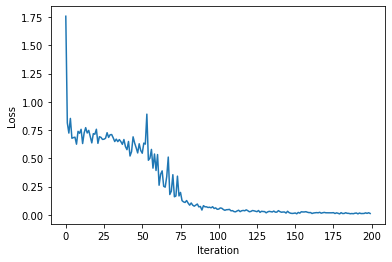

In [4]:
    for epoch in range(EPOCH):  
        a_int = np.random.randint(largest_number / 2)
        b_int = np.random.randint(largest_number / 2)
        c_int = a_int + b_int
        a_binary = int2binary(a_int, dim)
        b_binary = int2binary(b_int, dim)
        c_binary = int2binary(c_int, dim)
        input_matrix = np.concatenate((a_binary, b_binary), axis=0).reshape(
            (2, dim))
        rnn.forward(input_matrix)
        rnn.backward(c_binary)
        rnn.update()
        if epoch % 100 == 0:
            loss = rnn.calc_loss(c_binary)
            losses.append(loss)

        if epoch % 1000 == 0:
            loss = rnn.calc_loss(c_binary)
            print("epoch:{}".format(epoch))
            print("Loss:{}".format(loss))
            print("Pred:" + str(rnn.prediction))
            print("True:" + str(c_binary))
            print("------------------------")
    plt.plot(losses)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

In [5]:
def test(dim,rnn):
    NUMBER = 100
    correct = 0
    largest_number = 2**dim - 1
    for i in range(NUMBER):
        a_int = np.random.randint(largest_number / 2)
        b_int = np.random.randint(largest_number / 2)
        c_int = a_int + b_int
        a_binary = int2binary(a_int, dim)
        b_binary = int2binary(b_int, dim)
        c_binary = int2binary(c_int, dim)
        input_matrix = np.concatenate((a_binary, b_binary), axis=0).reshape(
            (2, dim))
        rnn.forward(input_matrix)
        if(np.sum(rnn.prediction - c_binary) == 0):
            correct += 1
        if i % 10 == 0:
            print("Input a:{:6} {}".format(a_int,a_binary))
            print("Input b:{:6} {}".format(b_int,b_binary))
            print("Predict c:{:6} {}".format(binary2int(rnn.prediction, dim),rnn.prediction))
            print("True c:   {:6} {}".format(c_int,c_binary))
            print("-----------------------------------------")
    print("Test accuracy:{}".format(correct/NUMBER))

In [6]:
# 用8位二进制数训练，16位二进制数测试
rnn2 = RNNLayer(input_dim=2,
               hidden_dim=16,
               output_dim=1,
               input_length=16,
               activator=Sigmoid(),
               learning_rate=0.1)
rnn2.change_parameter(rnn.U,rnn.W,rnn.V)

In [7]:
test(16,rnn2)

Input a: 11075 [[1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.]]
Input b: 21929 [[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]]
Predict c:33004.0 [[0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.]]
True c:    33004 [[0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.]]
-----------------------------------------
Input a: 24103 [[1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.]]
Input b:  5167 [[1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]]
Predict c:29270.0 [[0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.]]
True c:    29270 [[0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.]]
-----------------------------------------
Input a: 31446 [[0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.]]
Input b:  5016 [[0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.]]
Predict c:36462.0 [[0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.]]
True c:    36462 [[0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.]]
-----------------------------------------
Input a:  2981 [[1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.